In [1]:
from fastai.vision.all import *
import cv2

In [14]:
import numpy as np

In [2]:
BASE_DIR = Path.cwd().parent
data_path = BASE_DIR / 'datasets/kitti_road'
data_path

Path('/media/fahad/TOSHIBA EXT/From E/From Dell/pyProgs/fastai_course/self-driving-cars/datasets/kitti_road')

In [3]:
def get_y(fn):
    return get_msk(fn, p2c)

In [4]:
learn = load_learner('initial.pkl')

In [5]:
res = learn.predict(data_path / 'testing/image_2/um_000012.png')

<AxesSubplot:>

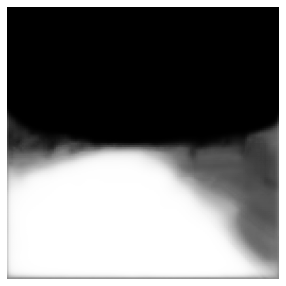

In [6]:
res[2][1].show(cmap='gray')

In [9]:
mask = res[2][1].detach().numpy()

In [10]:
mask.shape

(256, 256)

In [21]:
mask_colored = np.zeros((*mask.shape, 3), dtype=np.uint8)
mask_colored.shape

(256, 256, 3)

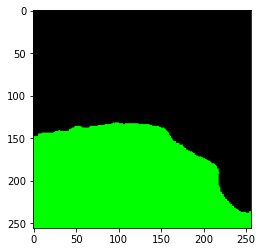

In [22]:
mask_colored[mask > 0.5] = [0, 255, 0]
plt.imshow(mask_colored)

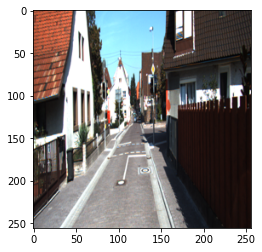

In [23]:
image = Image.open(data_path / 'testing/image_2/um_000012.png').convert('RGB').resize((256, 256))
image = np.array(image)
plt.imshow(image)

In [24]:
def get_overlayed_image(img, msk):
    return cv2.addWeighted(img,0.8,msk,0.2,0)

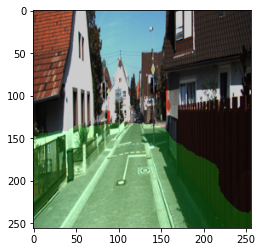

In [25]:
result = get_overlayed_image(image, mask_colored)
plt.imshow(result)